In [11]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [12]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '0'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
#model_names = [mn for mn in model_names if 'SelfAttn' in mn]
#model_names = [mn for mn in model_names if 'b=129' in mn]
model_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=12*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=24*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=8

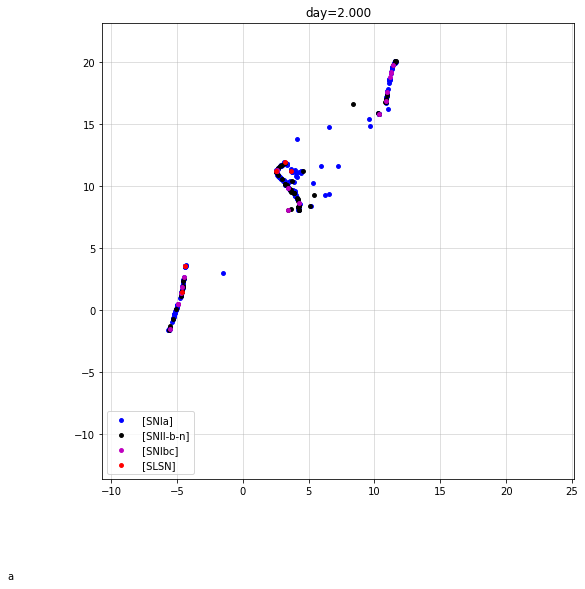

IndexError: list index out of range

In [26]:
import fuzzytools.files as files
import matplotlib.pyplot as plt
from fuzzytools.matplotlib.scatters import scatter
from fuzzytools.matplotlib.lims import get_lims
from fuzzytools.cuteplots.animators import PlotAnimator
import numpy as np

model_name = 'test/mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129'
filedir = f'../save/{model_name}/pre-training/dim_reductions/{cfilename}/0@test/id=1000.d'
d = files.load_pickle(filedir)
days = d['days']

plot_animator = PlotAnimator()
xy_values = np.concatenate([d['days_dim_reductions'][day] for day in days], axis=0)
xlim, ylim = get_lims(xy_values)

for day in days[::1]:
    x = d['days_dim_reductions'][day]
    y = d['days_y_true'][day]
    class_names = d['class_names']
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    s = 15
    scatter_kwargs = {
        'SLSN':{'c':'r', 's':s},
        'SNIa':{'c':'b', 's':s},
        'SNII-b-n':{'c':'k', 's':s},
        'SNIbc':{'c':'m', 's':s},
    }
    scatter(ax, x, y, class_names, scatter_kwargs)
    ax.set_title(f'day={day:.3f}')
    ax.legend(loc='lower left')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(alpha=.5);ax.set_axisbelow(True)
    #plot_animator.append(fig)
    plt.text(  # position text relative to Figure
        0.0, 0.0, 'a',
        ha='right', va='top',
        transform=fig.transFigure
    )
    fig.tight_layout()
    plt.show()
    break
plot_animator.save('../temp/e.mp4') # gif mp4